# Problem 1: Optical Light curve classification

### Problem Motivation 

As ZTF, Rubin and other large surveys come on line, there are literally billions of objects with photometric time series. Machine learning methods are required to have any hope to classify these objects photometrically. Light curve features, including periodicity metrics, have been developed for subsets of these sources, creating training data sets upon which to build classifiers. The project would be to apply different ML techniques to this classification problem.

### Data-set
The provided dataset consists of features extracted from the light curves. In principle, the light curves themselves can be queried from classified source catalogs, although we will not be doing that here. There are 51 total class labels in the dataset. There are two sets of label hierarchies: 

**phenomenological** = how it appears; observed characteristics, 
**ontological** = what it is classified as in astronomical terminology 

<img src="figures/phenomenological.svg" alt="" width="500" height="695">
<img src="figures/ontological.svg" alt="" width="600" height="695">

### The goal
The goal is to make: 

1) a real vs bogus classifier

2) a variable vs non-variable classifier

As a bonus, can try to classify objects further down the ontological and phenomenological trees.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [2]:
ztf_df = pd.read_csv('data/dataset.csv')
ztf_columns = list(ztf_df.columns)
labeled_columns = ztf_columns[ztf_columns.index('AGN') : ztf_columns.index('wrong period')]
feature_columns = ztf_columns[ztf_columns.index('AllWISE___id') : ]
feature_columns.remove('AllWISE__ph_qual') # cleaned the dataset by removing non-numeric Features
print("Labels \n",labeled_columns,"\n\nFeatures\n",feature_columns)


Labels 
 ['AGN', 'BL Her', 'Beta Lyr', 'Cepheid', 'Cepheid type-II', 'Delta Scu', 'EA', 'EB', 'EW', 'F', 'LPV', 'Mira', 'O', 'RR Lyrae', 'RR Lyrae Blazhko', 'RR Lyrae ab', 'RR Lyrae c', 'RR Lyrae d', 'RS CVn', 'RV Tau', 'SRV', 'W Uma', 'W Virginis', 'YSO', 'binary star', 'blend', 'bogus', 'bright star', 'ccd artifact', 'compact binary', 'detached eclipsing MS-MS', 'dipping', 'double period', 'eclipsing', 'eclipsing WD+dM (NN Ser)', 'eclipsing sdB+dM (HW Vir)', 'elliptical', 'flaring', 'galaxy', 'half period', 'irregular', 'long timescale', 'multi periodic', 'nice', 'niice', 'non-variable', 'periodic', 'pulsator', 'sawtooth', 'sinusoidal', 'variable'] 

Features
 ['AllWISE___id', 'AllWISE__w1mpro', 'AllWISE__w1sigmpro', 'AllWISE__w2mpro', 'AllWISE__w2sigmpro', 'AllWISE__w3mpro', 'AllWISE__w3sigmpro', 'AllWISE__w4mpro', 'AllWISE__w4sigmpro', 'Gaia_DR2___id', 'Gaia_DR2__astrometric_excess_noise', 'Gaia_DR2__parallax', 'Gaia_DR2__parallax_error', 'Gaia_DR2__phot_bp_mean_mag', 'Gaia_DR2__ph

### Part 1:  

Examine the data set and plot the correlation matrix



## Part 2

Create a __'real' vs. 'bogus'__ classifier. For now, remove samples where the 'bogus' label isn't equal to eitehr 0 or 1. (Don't forget to standardize all the feature values. 

## Part 3

Now we will use GridSearchCV to try out a variety of Random Forest Classifiers. We suggest only using the first 5000 samples because it is sooo slow (Remember that GridSearchCV is a brute force approach)

## Part 4

Once you've obtained the "best" parameters, create and train the model after splitting the data into a 90/10 training/testing split. Show the results and confusion matrix. What does a confusion matrix represent?

## Part 5

Plot the ROC curve (Hint: Calculate the False Positive and True Positive Rates)

Set a threshold of 0.8 for your FPR and TPR and find the new accuracy and confusion matrix when the threshold is applied.


## Part 6

Now, balance the classes and repeat steps 4 and 5. 

## Part 7


Now, use a Multi-Layer Perceptron to classify. However, use a different Grid Search: Randomized Grid Search and repeat the previous steps. Show the accuracy and best parameters. 

## Part 8: Variable vs Non-variable binary classification


Get the subset of the data classfied as variable within the bogus values. Repeat the steps of the Random Forest algorithm to classify. 

In [22]:
#mask for the real-variable split
mask_bogus = bogus_classifier.subset_data(label=0)
#data to be classified as variable or non-var
X_variable = ...
y_variable = ...

## Part 9: Periodic vs. non-periodic binary classification

Same thing but with periodic data within non-bogus data. 

In [ ]:
mask_variable = variable_classifier.subset_data(label=1)
X_periodic = ...
y_periodic = ...

# Problem 2

In this problem, you will apply your (newly acquired) knowledge of deep learning 101
to build a classifier for a real life problem (well, actually not, but almost
-- see the very end of this exercise).

In [30]:
path_base = './'
path_data = './data'
path_model = './models'

## The problem: the `rbp` classifier for the `GTF`

 You are running a state-of-the-art *robotic* sky survey called the Geeky Transient Facility,
 or GTF, perhaps somewhere in the Southern Hemisphere.
 You have a fancy image-differencing pipeline that allows you to find interesting objects in the
 dynamic sky every night, such as supernovae, variable stars, and asteroids, and send them
 out to the world as alerts.

 However you notice two things:

 1. Your fancy image-differencing pipeline produces a lot of bogus detections.
 With the increasing data rates you are worried that one day you will run out of
 graduate students to examine/scan the potentially interesting candidate sources.

 2. Your AGI-based robot-telescope is extraordinarily sophisticated and smart,
 but has one major soft spot: it really likes platypuses. In fact, the robot likes them
 so much (obsessed, really) that whenever a platypus appears in the vicinity, it halts observing
 and instead takes a picture of it and sends it out as an alert.

So you decide to build a `real, bogus, or platypus` (`rbp` for short) classifier for GTF.


## Transfer learning

You are not the first one to encounter a problem like this, so you decide to apply the
[*transfer learning*](https://www.tensorflow.org/tutorials/images/transfer_learning)
technique and use the real-bogus classifier `braai` that is employed
by a similar survey called [ZTF](https://ztf.caltech.edu) running in the Northern Hemisphere.


Import the necessities:

In [31]:
import os
from astropy.visualization import ZScaleInterval
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.keras import TqdmCallback

### The model

Download a pre-trained model:

In [32]:
path_model = 'models/'
model_name = 'braai_d6_m9.h5'

Load the model:

In [33]:
model = tf.keras.models.load_model(os.path.join(path_model,model_name))

In [34]:
model.summary()

Model: "VGG6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 61, 61, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 59, 59, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 27, 27, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0      

We will be using the [functional API of `tf.keras`](https://www.tensorflow.org/guide/keras/functional).

## Part 1: Remove the output layer, leave the feature extraction part of the network in place

## Part 2: Create a new output layer that will provide the probabilities for our three classes.

Use tf.keras.layers.Dense with 3 ``units``, representing the dimensionality of the output space.ew output layer that will provide the probabilities for our three classes.

# Part 3: You can now compile the model and it is ready for training!

The new model architecture is ready! You may optionally "freeze" the weights in the feature-extracting
part of the network and only train the "head" of the network that does the classification -- feel
free to play around with this once you're done with the exercise.

Compile the model with the ``adam`` optimizer, ``categorical_crossentropy`` loss, and ``BinaryAccuracy, Precision, Recall, and AUC`` metrics.

In [38]:
# mark layers as not trainable
# for layer in model_tl.layers[:-1]:
# 	layer.trainable = False

### The data

You have collected training examples and now need to make a dataset out of them.

In [40]:
p = pathlib.Path('data')

bogus = np.array([np.load(pp) for pp in (p / 'bogus').glob('*.npy')])
real = np.array([np.load(pp) for pp in (p / 'real').glob('*.npy')])
platypus = np.array([np.load(pp) for pp in (p / 'platypus').glob('*.npy')])

data = np.vstack((bogus, real, platypus))

In [41]:
bogus.shape, real.shape, platypus.shape

((100, 63, 63, 3), (100, 63, 63, 3), (51, 63, 63, 3))

Make labels:

In [42]:
indices = [0 for _ in range(bogus.shape[0])] +\
    [1 for _ in range(real.shape[0])] +\
    [2 for _ in range(platypus.shape[0])]
labels = tf.one_hot(indices, depth=3, dtype=tf.int8).numpy()
# labels


## Part 4: Perform the train/validation/test split on indices (we will use an 81\% / 9\% / 10\% split)

In [2]:
#Feel free to play around with these
batch_size = 4
shuffle_buffer_size = 4

epochs = 20

We will feed the model with data stored as `tf.data.Dataset`'s:

Now shuffle, batch, and repeat the data. Let's also apply some data augmentation (random horizontal
and vertical flips) to make the classifier more robust:

In [46]:
# train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size).repeat(epochs)
# flipping:
train_dataset = train_dataset.cache().map(
    lambda image, label: (tf.image.random_flip_left_right(image), label)
).map(
    lambda image, label: (tf.image.random_flip_up_down(image), label)
).shuffle(shuffle_buffer_size).batch(batch_size).repeat(epochs)
val_dataset = val_dataset.batch(batch_size).repeat(epochs)
test_dataset = test_dataset.batch(batch_size)

We now need to compute for how many epochs to train, validate, and test the classifier:

In [47]:
steps_per_epoch_train = len(train_indexes) // batch_size - 1
steps_per_epoch_val = len(val_indexes) // batch_size - 1
steps_per_epoch_test = len(test_indexes) // batch_size - 1
steps_per_epoch_train, steps_per_epoch_val, steps_per_epoch_test

(49, 4, 5)

## Part 5: We don't want to [overfit](https://en.wikipedia.org/wiki/Overfitting), so we will halt training if the loss on the validation dataset is not improving for, say 5 consecutive epochs.

## Part 6: We are ready to fit and evaluate the model!

Great! The model is trained and we can now evaluate it on the test set:

In [50]:
model_tl.evaluate(test_dataset)

7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000


[0.00108251697383821, 1.0, 1.0, 1.0, 1.0]

Let's visualize our model's predictions:

'real:'

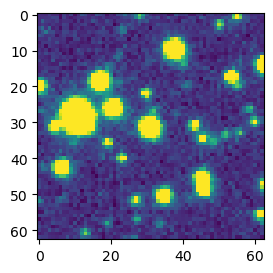

'bogus:'

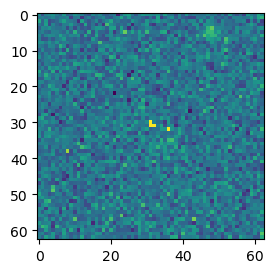

'real:'

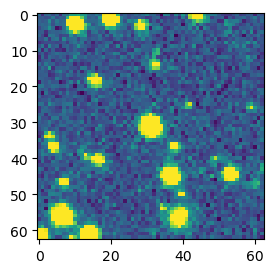

'bogus:'

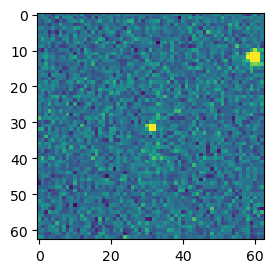

'real:'

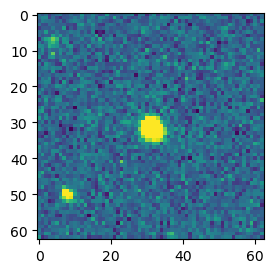

'real:'

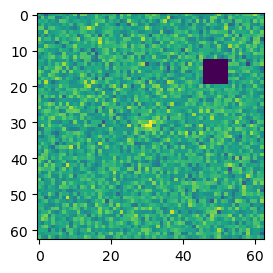

'real:'

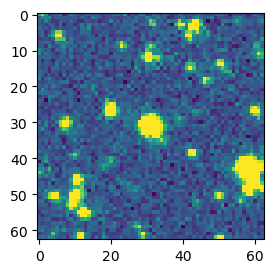

'platypus:'

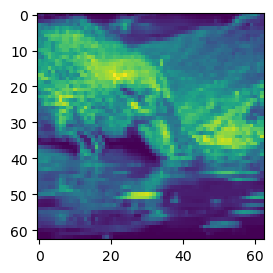

'bogus:'

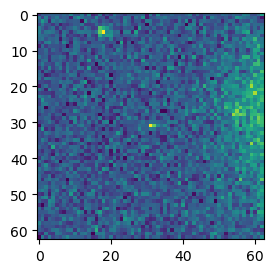

'real:'

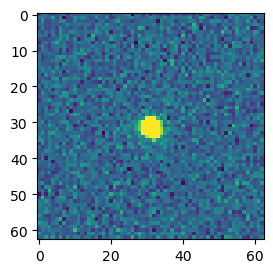

'real:'

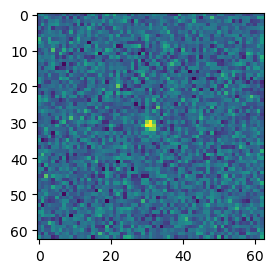

'platypus:'

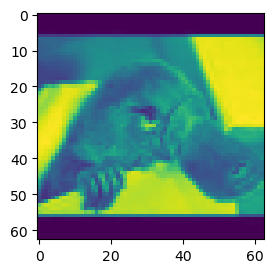

'platypus:'

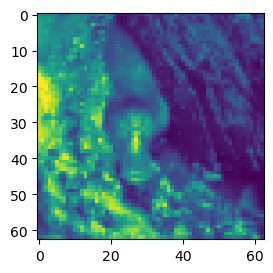

'real:'

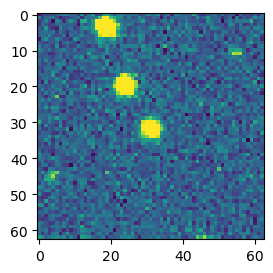

'bogus:'

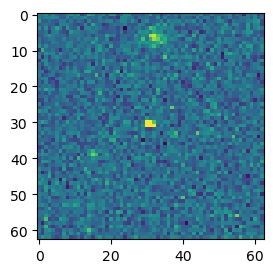

'platypus:'

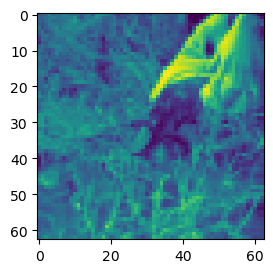

'real:'

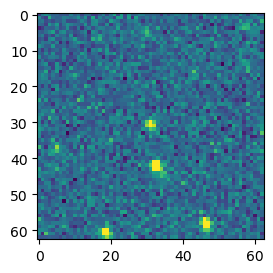

'bogus:'

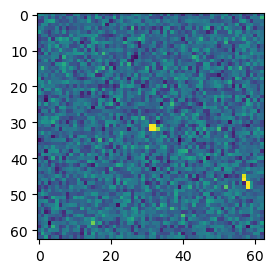

'real:'

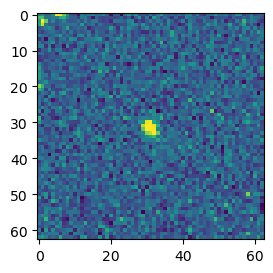

'bogus:'

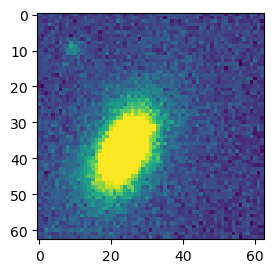

'platypus:'

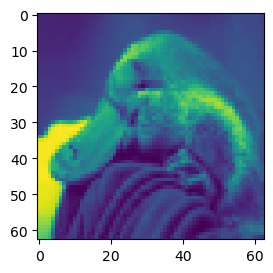

'bogus:'

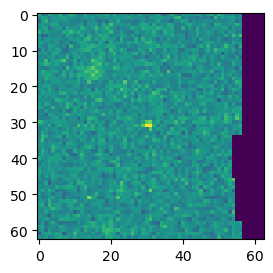

'real:'

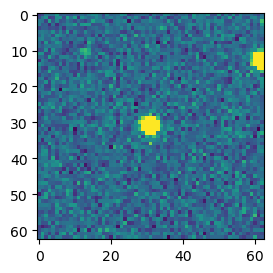

'bogus:'

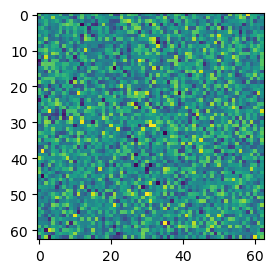

'real:'

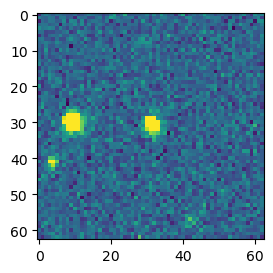

'bogus:'

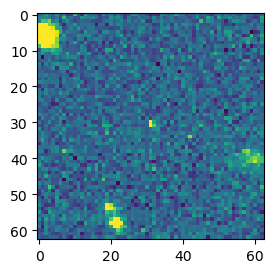

In [51]:
ll = {0: 'bogus', 1: 'real', 2: 'platypus'}

for ii in test_indexes:
    interval = ZScaleInterval()
    limits = interval.get_limits(data[ii, ..., 0])

    fig = plt.figure(figsize=(3, 3), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(data[ii, ..., 0], vmin=limits[0], vmax=limits[1])

    p = np.argmax(model_tl.predict(np.expand_dims(data[ii], axis=0))[0])
    display(f"{ll[p]}:")

    plt.show()
    # break

## Unsolicited wisdom

Even though this may seem like some ridiculous nonsense, you've actually implemented a real-life
transfer learning pipeline:
you took an off-the-shelf production DL model, then using a part of it as a pre-trained feature extractor,
adapted its architecture to a different problem, and trained on data the original model never saw, achieving
very good results.


# Extra Credit: Homework Form: https://forms.gle/5tabZizesoqokPyb9

### Did you fill it out?